# COG260 Final Project
## Group: Victor Cho & Tony Niu
## Date: Monday, December 14, 2020
## Personality Prediction

Naive Bayes Classifer - Classifier that uses supervised learning algorithms based on applying the Bayes theorem with the naive assumption of condition dependence between every pair of features within the values (class variables). Although this is simpler than most supervised learning algorithms, it only gives us a rough prediction. This, as consistent as it is to our MBTI prediction goal since real life MBTI tests are not always accurately reflective, does not give us an absolute certainty of prediction. Therefore, the results should not be interpreted with absolute confidence. 

In [57]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
import string
from nltk.classify import NaiveBayesClassifier


In [58]:
# import dataset
df = pd.read_csv ('data/mbti_1.csv')
# Check for null values
df.isnull().any()

type     False
posts    False
dtype: bool

In [59]:
# Check data shape
df.shape

(8675, 2)

In [60]:
# Find the number of posts 
counter = 0

for i in range(0, df.shape[0]):
    if(len(df.iloc[i, 1].split('|||'))) != 50:
        counter += 1
if counter != 0:
    print("There are", counter, "cells that contain less than 50 posts.")
else:
    print("All of the cells contain exactly 50 posts.")
        
# len(df.iloc[1,1].split('|||'))

There are 1088 cells that contain less than 50 posts.


In [61]:
# Find unique values from the personality column
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [62]:
# number of users who identify as a specific personality
df.groupby('type').agg({'type':'count'})

,type
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


In [63]:
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/len(x.split("|||")))
print(df.head())

   type                                              posts  words_per_comment
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...              11.12
1  ENTP  'I'm finding the lack of me in these posts ver...              23.40
2  INTP  'Good one  _____   https://www.youtube.com/wat...              16.72
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...              21.28
4  ENTJ  'You're fired.|||That's another silly misconce...              19.34


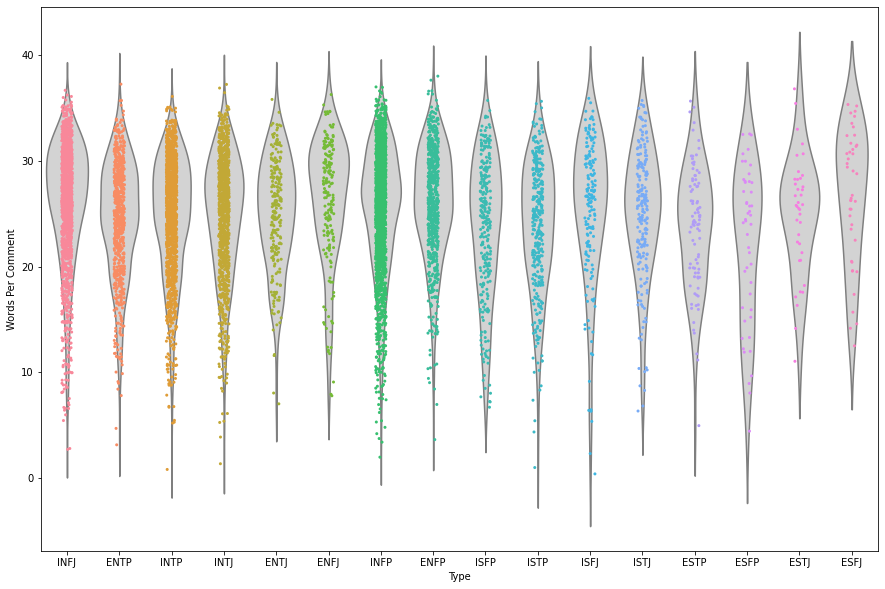

In [64]:
plt.figure(figsize = (15, 10))

sns.violinplot(x = 'type', y = 'words_per_comment', data = df, inner = None, color = 'lightgray')
sns.stripplot(x = 'type', y = 'words_per_comment', data = df, size = 3, jitter = True)
plt.ylabel('Words Per Comment')
plt.xlabel('Type')

plt.show()

In [65]:
info = {}

for i in range(len(df)):
    info[i] = [df["type"][i], df["posts"][i].split("|||")]
    
len(info[0][1])
info[0][0] == 'INFJ'

number_of_posts = {}

for i in range(0, len(info)):
    if info[i][0] not in number_of_posts:
        number_of_posts[info[i][0]] = len(info[i][1])
    else:
        number_of_posts[info[i][0]] += len(info[i][1])
    
number_of_posts

{'INFJ': 72105,
 'ENTP': 33761,
 'INTP': 63359,
 'INTJ': 52471,
 'ENTJ': 11273,
 'ENFJ': 9288,
 'INFP': 89796,
 'ENFP': 32769,
 'ISFP': 13000,
 'ISTP': 16498,
 'ISFJ': 8121,
 'ISTJ': 9913,
 'ESTP': 4337,
 'ESFP': 2215,
 'ESTJ': 1921,
 'ESFJ': 2018}

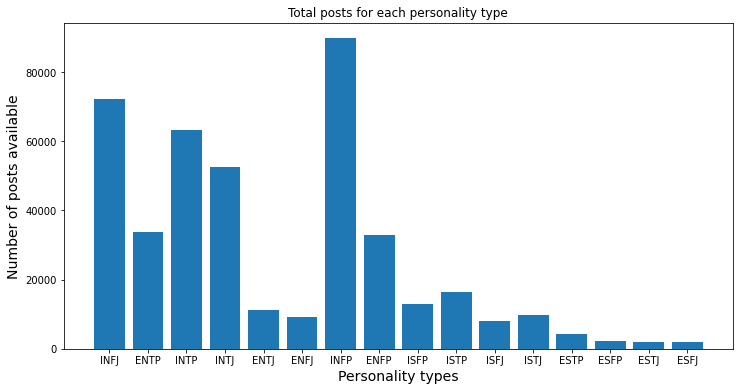

In [66]:
plt.figure(figsize = (12,6))
plt.bar(range(len(number_of_posts)), list(number_of_posts.values()), align = 'center')
plt.xticks(range(len(number_of_posts)), list(number_of_posts.keys()))
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')
plt.show()

In [67]:
# Segrating all the posts by their personality types and creating a new dataframe to store all this in
all_posts = pd.DataFrame()
for j in types:
    temp1 = df[df['type'] == j]['posts']
    temp2 = []
    for i in temp1:
        temp2 += i.split('|||')
    temp3 = pd.Series(temp2)
    all_posts[j] = temp3

all_posts.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


**** The NaiveBayesClassifier Model ****

The Myers-Briggs Type Indicator (MBTI) divides everyone into 16 unique personality types:

ISTJ, ISFJ, INFJ, INTJ
ISTP, ISFP, INFP, INTP
ESTP, ESFP, ENFP, ENTP
ESTJ, ESFJ, ENFJ, ENTJ

The following model is used to fit these 16 personality types according to specific words they use

We will use this and create 1 classifier to get an accuracy score

In [68]:
# tokenise words
# nltk.corpus.stopwords.words("english") contains commonly used words such as "a", "an", "the"
# string.punctuation contains punctuations such as "!", "(", "=", etc.

useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

def build_bag_of_words_features_filtered(words):
    # returns a dictionary of words that are not useless words or punctuations
    words = nltk.word_tokenize(words)
    return {
        word:1 for word in words \
        if not word in useless_words}

In [69]:
# demonstration of the function
all_posts['INTJ'].iloc[10]

"I have toyed with the idea of the OP being an extrovert also for awhile now, actually. After many conversations with him, however I'm disinclined to believe it due to OP being much too close with Fi..."

In [70]:
build_bag_of_words_features_filtered(all_posts['INTJ'].iloc[10])

{'I': 1,
 'toyed': 1,
 'idea': 1,
 'OP': 1,
 'extrovert': 1,
 'also': 1,
 'awhile': 1,
 'actually': 1,
 'After': 1,
 'many': 1,
 'conversations': 1,
 'however': 1,
 "'m": 1,
 'disinclined': 1,
 'believe': 1,
 'due': 1,
 'much': 1,
 'close': 1,
 'Fi': 1,
 '...': 1}

In [71]:
# create array of features
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() # not all the personality types have same number of files
    features += [[(build_bag_of_words_features_filtered(i), j) for i in temp1]]

In [72]:
# each number of personality types have different number of posts
# therefore, they must be splitted accordingle
# we will split 80% for training and 20% for testing

split=[]
for i in range(16):
    split += [len(features[i]) * 0.8]
split = np.array(split, dtype = int)

split

array([7430, 7430, 7430, 7430, 1614, 1772, 1536, 3469, 7430, 7430, 7430,
       7430, 6496, 7430, 7430, 7430])

In [73]:
# creating the train data
train=[]
for i in range(16):
    train += features[i][:split[i]]

In [74]:
# train the model
model_train = NaiveBayesClassifier.train(train)

In [75]:
# testing the model on the training dataset
a = nltk.classify.util.accuracy(model_train, train)*100
print(a)

43.92808718962502


In [76]:
# creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [77]:
# testing the model on the test dataset
b = nltk.classify.util.accuracy(model_train, test)*100
print(b)

10.429168563506188


In [78]:
temp = {'train' : a, 'test' : b}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['All personalities'])
results

,All personalities
train,43.928087
test,10.429169


In [79]:
training_accuracy = []
testing_accuracy = []

**** I / E ****

In [80]:
# this is a classifier for Introversion (I) and Extroversion (E)
features = []
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna()
    if('I' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Introvert') \
        for i in temp1]]
    if('E' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Extrovert') \
        for i in temp1]]

In [81]:
# split the data 80% - 20%
train = []
for i in range(16):
    train += features[i][:split[i]] 

In [82]:
# training the model
intro_extro = NaiveBayesClassifier.train(train)

In [83]:
# testing the model on the training dataset
training_accuracy.append(nltk.classify.util.accuracy(intro_extro, train) * 100)
nltk.classify.util.accuracy(intro_extro, train) * 100

80.76528975232102

In [84]:
# creating the test data
test = []
for i in range(16):
    test += features[i][split[i]:]

In [85]:
# testing the model on the test dataset
testing_accuracy.append(nltk.classify.util.accuracy(intro_extro, test) * 100)
nltk.classify.util.accuracy(intro_extro, test) * 100

58.10536771096304

**** N / S ****

In [86]:
# this is a classifier for Intuition (N) and Sensing (S)
features = []
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna()
    if('N' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Intuition') \
        for i in temp1]]
    if('S' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Sensing') \
        for i in temp1]]

In [87]:
# split the data 80% - 20%
train = []
for i in range(16):
    train += features[i][:split[i]] 

In [88]:
# training the model
intuition_sensing = NaiveBayesClassifier.train(train)

In [89]:
# testing the model on the training dataset
training_accuracy.append(nltk.classify.util.accuracy(intuition_sensing, train) * 100)
nltk.classify.util.accuracy(intuition_sensing, train) * 100

81.13893000196653

In [90]:
# creating the test data
test = []
for i in range(16):
    test += features[i][split[i]:]

In [91]:
# testing the model on the test dataset
testing_accuracy.append(nltk.classify.util.accuracy(intuition_sensing, test) * 100)
nltk.classify.util.accuracy(intuition_sensing, test) * 100

61.10168439349418

**** T / F ****

In [92]:
# this is a classifier for Thinking (T) and Feeling (F)
features = []
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('T' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Thinking') \
        for i in temp1]]
    if('F' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Feeling') \
        for i in temp1]]

In [93]:
# split the data 80% - 20%
for i in range(16):
    train += features[i][:split[i]]

In [94]:
# training the model
thinking_feeling = NaiveBayesClassifier.train(train)

In [95]:
# testing the model on the training dataset
training_accuracy.append(nltk.classify.util.accuracy(thinking_feeling, train) * 100)
nltk.classify.util.accuracy(thinking_feeling, train) * 100

42.61154869225913

In [96]:
# creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [97]:
# testing the model on the test dataset
testing_accuracy.append(nltk.classify.util.accuracy(thinking_feeling, test) * 100)
nltk.classify.util.accuracy(thinking_feeling, test) * 100

30.377022720688657

**** J / P ****

In [98]:
# this is a classifier for Judging (J) and Perceiving (P)
features=[]
for j in types:
    temp1 = all_posts[j]
    temp1 = temp1.dropna() #not all the personality types have same number of files
    if('J' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Judging') \
        for i in temp1]]
    if('P' in j):
        features += [[(build_bag_of_words_features_filtered(i), 'Percieving') \
        for i in temp1]]

In [99]:
# split the data 80% - 20%
train = []
for i in range(16):
    train += features[i][:split[i]]

In [100]:
# training the model
judging_perceiving = NaiveBayesClassifier.train(train)

In [101]:
# testing the model on the training dataset
training_accuracy.append(nltk.classify.util.accuracy(judging_perceiving, train) * 100)
nltk.classify.util.accuracy(judging_perceiving, train) * 100

79.38458035335397

In [102]:
# creating the test data
test=[]
for i in range(16):
    test += features[i][split[i]:]

In [103]:
# testing the model on the test dataset
testing_accuracy.append(nltk.classify.util.accuracy(judging_perceiving, test) * 100)
nltk.classify.util.accuracy(judging_perceiving, test)*100

54.38480321152175

**** Summary ****

In [104]:
temp = {'train' : training_accuracy, 'test' : testing_accuracy}
results = pd.DataFrame.from_dict(temp, orient='index', columns=['Introvert - Extrovert', 'Intuition - Sensing', 'Thinking - Feeling', 'Judging - Percieiving'])
results

,Introvert - Extrovert,Intuition - Sensing,Thinking - Feeling,Judging - Percieiving
train,80.765290,81.138930,42.611549,79.384580
test,58.105368,61.101684,30.377023,54.384803


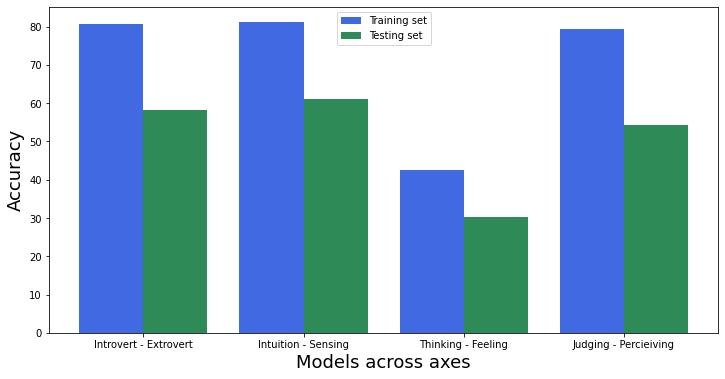

In [105]:
# data visualization

labels = np.array(results.columns)

training = results.loc['train']
ind = np.arange(4)
width = 0.4
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, training, width, color = 'royalblue')

testing = results.loc['test']
rects2 = ax.bar(ind + width, testing, width, color = 'seagreen')

fig.set_size_inches(12, 6)
fig.savefig('Results.png', dpi = 200)

ax.set_xlabel('Models across axes', size = 18)
ax.set_ylabel('Accuracy', size = 18)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels)
ax.legend((rects1[0], rects2[0]), ('Training set', 'Testing set'))
plt.show()